In [435]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime, calendar, time
%matplotlib inline

Read in the buildings file

In [436]:
header = ['id','user','version','minVersion','validSince','validUntil','geoType']
buildings = pd.read_csv('../util/buildings.data',names=header, sep='\t')

Calculate new columns and convert to Python objects

In [437]:
buildings['date'] = buildings.validSince.apply(lambda x: pd.Timestamp(x*1000000000).date())
buildings.replace("false", np.NaN, inplace=True)
buildings.validUntil = buildings['validUntil'].astype(float)

In [438]:
buildings.id.count(), buildings.id.nunique(), buildings.user.nunique(), buildings.query('version==1').id.count()

(65686, 55720, 374, 57173)

Set all `validUntil` dates to today

In [439]:
TIME_NOW = calendar.timegm(time.gmtime())
buildings.validUntil.replace(np.NaN, TIME_NOW, inplace=True)
buildings.validUntil = buildings.validUntil.astype(int)
buildings['lifespan'] = buildings.apply(lambda r: r.validUntil - r.validSince, axis=1)

Look at what we're working with

In [440]:
buildings.head(1)

,id,user,version,minVersion,validSince,validUntil,geoType,date,lifespan
0,460578747,freebeer,1,0.0,1482167715,1535595386,Polygon,2016-12-19,53427671


In [441]:
buildings.dtypes

id              int64
user           object
version         int64
minVersion    float64
validSince      int64
validUntil      int64
geoType        object
date           object
lifespan        int64
dtype: object

In [442]:
buildings.head(3)

,id,user,version,minVersion,validSince,validUntil,geoType,date,lifespan
0,460578747,freebeer,1,0.0,1482167715,1535595386,Polygon,2016-12-19,53427671
1,460578739,freebeer,1,0.0,1482167715,1535595386,Polygon,2016-12-19,53427671
2,460578756,freebeer,1,0.0,1482167716,1535595386,Polygon,2016-12-19,53427670


In [443]:
latest_versions = buildings.query("validUntil=={0}".format(TIME_NOW))

In [444]:
sns.set_style("dark")
ax = plt.figure(num=None, figsize=(10, 2), dpi=95)
buildings.height.hist(bins=20)
fig = plt.gcf()
fig.autofmt_xdate()

AttributeError: 'DataFrame' object has no attribute 'height'

When were buildings created in Detroit?

In [445]:
gb_dates = buildings.query('version==1').groupby('date').aggregate({'id':pd.Series.count, 'user': pd.Series.nunique})

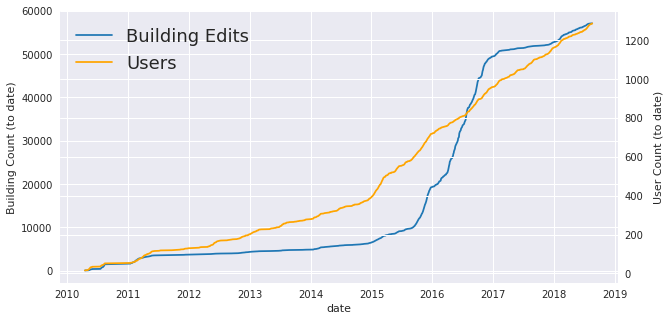

In [446]:
sns.set_style("darkgrid"); axes = []
axes.append( gb_dates.id.cumsum().rolling(window=30).mean().plot(figsize=(10,5)) )
axes.append( gb_dates.user.cumsum().rolling(window=30).mean().plot(figsize=(10,5), color='orange', ax=axes[0].twinx()) )
lines, labels = axes[0].get_legend_handles_labels()
for ax in axes[1:]:
    line, label = ax.get_legend_handles_labels()
    lines += line
axes[-1].legend(lines, ['Building Edits','Users'], loc=0, fontsize=18);
axes[0].set_ylabel('Building Count (to date)');
axes[1].set_ylabel('User Count (to date)');

What about the latest edits to buildings?

In [452]:
gb_dates = latest_versions.groupby('date').aggregate({'id':pd.Series.count, 'user': pd.Series.nunique})

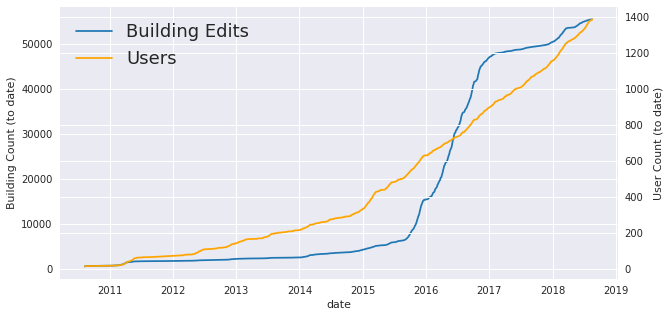

In [453]:
sns.set_style("darkgrid"); axes = []
axes.append( gb_dates.id.cumsum().rolling(window=30).mean().plot(figsize=(10,5)) )
axes.append( gb_dates.user.cumsum().rolling(window=30).mean().plot(figsize=(10,5), color='orange', ax=axes[0].twinx()) )
lines, labels = axes[0].get_legend_handles_labels()
for ax in axes[1:]:
    line, label = ax.get_legend_handles_labels()
    lines += line
axes[-1].legend(lines, ['Building Edits','Users'], loc=0, fontsize=18);
axes[0].set_ylabel('Building Count (to date)');
axes[1].set_ylabel('User Count (to date)');

How long between building edits?

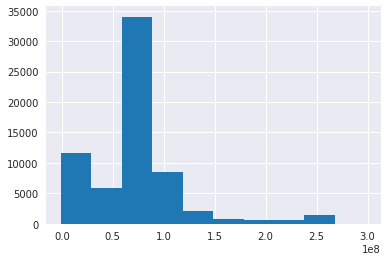

In [454]:
buildings.lifespan.hist()